In [2]:
# Importings base libraries
import os;
import pandas as pd; 
import librosa;
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
# Will read from the pickle file - use ingestion when ready
training_data_path   = os.path.join(".","dados","training_data.pickle")
validation_data_path = os.path.join(".","dados","validation_data.pickle")

In [4]:
# Will read only part of the data
training = pd.read_pickle(training_data_path).sample(1000)

In [5]:
training.shape

(1000, 88204)

In [6]:
[col for col in training.columns]

['label',
 'duracao',
 'sr',
 'original_file',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 

In [29]:
def get_audio_and_sampling_rate_from_df(df, row_index, asNumpyArray = True ):
    data, sampling_rate, label = get_data_sample_rate_and_legend_from_df(df, row_index, asNumpyArray)
    return(data, sampling_rate)

def get_data_sampling_rate_and_legend_from_df(df, row_index, asNumpyArray = True):
    data = df.iloc[ row_index , df.columns.get_loc(0): ].astype('float64')
    if(asNumpyArray):
        data = data.values
    sample_rate = df.loc[: , "sr"].iloc[row_index]
    label = df.loc[ : , 'label'].iloc[row_index]
    return(data, sample_rate, label)
    
def show_data(df, row):
    # Retrieve information from DF
    audio_data, sampling_rate, label = get_data_sample_rate_and_legend_from_df(df, row)
    
    # Print some stats and display the sound
    print(f"{label}({librosa.get_duration(audio_data, sr=sampling_rate)} sec)")
    ipd.display(ipd.Audio(audio_data, rate=sampling_rate))
    
    print("\n")
    # Make plots
    X = librosa.stft(audio_data)
    Xdb = librosa.amplitude_to_db(abs(X))

    plt.figure(figsize=(8, 16), dpi= 80, facecolor='w', edgecolor='k')

    plt.subplot(3, 1, 1)
    plt.title("Wave")
    librosa.display.waveplot(audio_data, sr=sampling_rate, x_axis="time")

    plt.subplot(3, 1, 2)
    plt.title("MEL")
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis="time", y_axis="mel")

    plt.subplot(3, 1, 3)
    plt.title("HZ")
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis="time", y_axis="hz")

    print("Audio")
    ipd.Audio(audio_data, rate = sampling_rate)

In [15]:
data, sampling_rate, label = get_data_sample_rate_and_legend_from_df(training, 3)


In [16]:
print(f"{label}({librosa.get_duration(data, sr=sampling_rate)} sec)")
ipd.Audio(data, rate = sampling_rate)

x(2.0 sec)


6(2.0 sec)




Audio


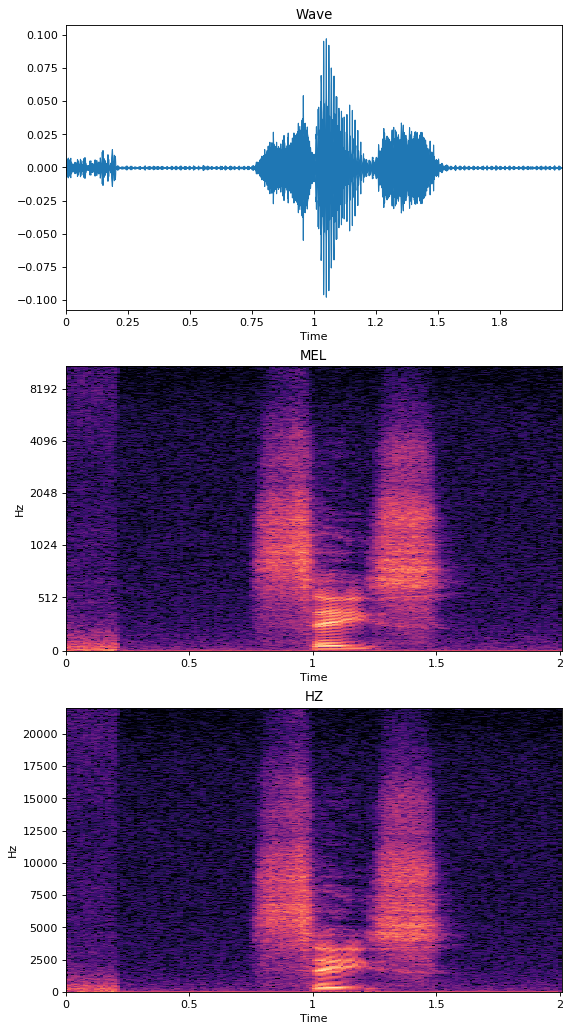

In [53]:
show_data(training, 1)